In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [32]:
# Create the labeled DataFrame for Naive Bayes analyses
# Drop unnecessary columns: Location, DatePosted, and ClosingDate
df_jobs_cleaned = pd.read_csv("df_jobs_cleaned.csv").drop(columns=['Location', 'DatePosted', 'ClosingDate'])
df_jobs_cleaned['DisabilityMention'] = df_jobs_cleaned['DisabilityMention'].map({True: 1, False: 0})

# Drop the 'JobCategory' column as it is not needed
df_jobs_cleaned = df_jobs_cleaned.drop(columns=['JobCategory'])

# Save the labeled DataFrame for Naive Bayes analyses
df_jobs_cleaned.to_csv("df_jobs_labeled.csv", index=False)
print("Labeled data for Naive Bayes analyses saved as df_jobs_labeled.csv")

# Load the labeled DataFrame for Naive Bayes analyses
df_labeled = pd.read_csv("df_jobs_labeled.csv")


Labeled data for Naive Bayes analyses saved as df_jobs_labeled.csv


In [33]:
print(df_labeled)

      SalaryMin  SalaryMax  VacancyDuration  DisabilityMention
0       59319.0   152771.0              365                  0
1      120246.0   156323.0              294                  0
2       64649.0   172500.0              364                  0
3       38560.0   123652.0              364                  0
4      100000.0   145000.0               11                  0
...         ...        ...              ...                ...
8395    59966.0    88786.0              365                  0
8396    59966.0    79050.0              365                  0
8397    88324.0   114818.0               95                  0
8398    35286.0    57607.0              343                  0
8399    39576.0    85844.0              187                  0

[8400 rows x 4 columns]


In [34]:
# Define the target variable
target = 'DisabilityMention'
X = df_labeled.drop(columns=[target])
y = df_labeled[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [39]:
# Display small samples of training and testing sets
print("Sample of Training Set (X_train):")
print(X_train.head())
print("Sample of Testing Set (X_test):")
print(X_test.head())
print("Sample of Training Labels (y_train):")
print(y_train.head())
print("Sample of Testing Labels (y_test):")
print(y_test.head())


Sample of Training Set (X_train):
      SalaryMin  SalaryMax  VacancyDuration
6106    45591.0   169378.0              364
3063    47813.0   155403.0              364
7427    31083.0   146757.0              364
1860    41235.0   155403.0              364
8049   112015.0   163252.0              211
Sample of Testing Set (X_test):
      SalaryMin  SalaryMax  VacancyDuration
33      47813.0   155403.0              364
5281    46081.0    59907.0               14
4912    57442.0   155403.0              364
3298    47813.0   155403.0              364
4756    78255.0   108995.0              182
Sample of Training Labels (y_train):
6106    0
3063    0
7427    0
1860    0
8049    0
Name: DisabilityMention, dtype: int64
Sample of Testing Labels (y_test):
33      0
5281    0
4912    0
3298    0
4756    0
Name: DisabilityMention, dtype: int64


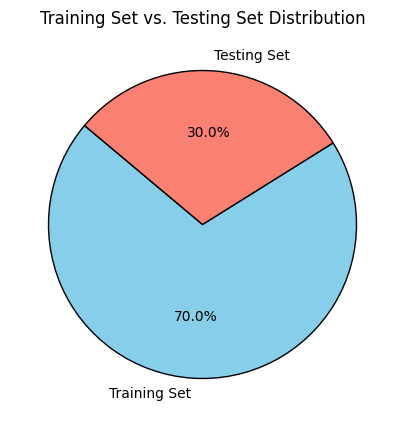

In [40]:
fig, ax = plt.subplots(figsize=(10, 5))
labels = ['Training Set', 'Testing Set']
sizes = [len(X_train), len(X_test)]
colors = ['skyblue', 'salmon']
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'edgecolor': 'black'})
plt.title('Training Set vs. Testing Set Distribution')
plt.savefig("training_testing_split.png")
plt.show()

In [35]:
# Multinomial Naive Bayes
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)

print("Multinomial Naive Bayes Results")
print(f"Accuracy: {accuracy_score(y_test, y_pred_mnb):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_mnb))
mnb_cm = confusion_matrix(y_test, y_pred_mnb)
print("Confusion Matrix:")
print(mnb_cm)

Multinomial Naive Bayes Results
Accuracy: 0.68
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.68      0.81      2493
           1       0.03      1.00      0.06        27

    accuracy                           0.68      2520
   macro avg       0.52      0.84      0.43      2520
weighted avg       0.99      0.68      0.80      2520

Confusion Matrix:
[[1683  810]
 [   0   27]]


In [36]:
# Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)

print("\nGaussian Naive Bayes Results")
print(f"Accuracy: {accuracy_score(y_test, y_pred_gnb):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_gnb))
print("Confusion Matrix:")
gnb_cm = confusion_matrix(y_test, y_pred_gnb)
print(gnb_cm)


Gaussian Naive Bayes Results
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2493
           1       1.00      1.00      1.00        27

    accuracy                           1.00      2520
   macro avg       1.00      1.00      1.00      2520
weighted avg       1.00      1.00      1.00      2520

Confusion Matrix:
[[2493    0]
 [   0   27]]


In [37]:
# Bernoulli Naive Bayes
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
y_pred_bnb = bnb.predict(X_test)

print("\nBernoulli Naive Bayes Results")
print(f"Accuracy: {accuracy_score(y_test, y_pred_bnb):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_bnb))
print("Confusion Matrix:")
bnb_cm = confusion_matrix(y_test, y_pred_bnb)
print(bnb_cm)


Bernoulli Naive Bayes Results
Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2493
           1       0.00      0.00      0.00        27

    accuracy                           0.99      2520
   macro avg       0.49      0.50      0.50      2520
weighted avg       0.98      0.99      0.98      2520

Confusion Matrix:
[[2493    0]
 [  27    0]]


/Users/yanxia/Downloads/MachineLearning/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/yanxia/Downloads/MachineLearning/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/yanxia/Downloads/MachineLearning/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

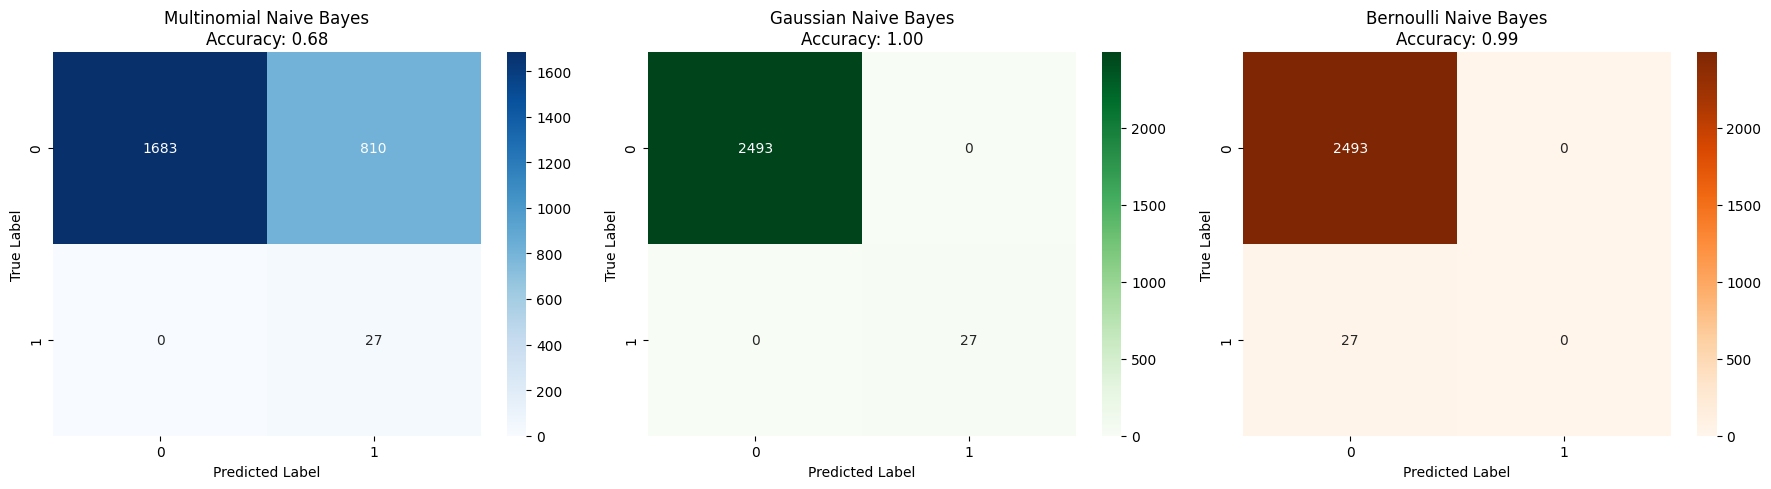

In [30]:
# Visualization of Confusion Matrices and Accuracies
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Multinomial Naive Bayes Confusion Matrix
sns.heatmap(mnb_cm, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title(f"Multinomial Naive Bayes\nAccuracy: {accuracy_score(y_test, y_pred_mnb):.2f}")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")

# Gaussian Naive Bayes Confusion Matrix
sns.heatmap(gnb_cm, annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title(f"Gaussian Naive Bayes\nAccuracy: {accuracy_score(y_test, y_pred_gnb):.2f}")
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("True Label")

# Bernoulli Naive Bayes Confusion Matrix
sns.heatmap(bnb_cm, annot=True, fmt="d", cmap="Oranges", ax=axes[2])
axes[2].set_title(f"Bernoulli Naive Bayes\nAccuracy: {accuracy_score(y_test, y_pred_bnb):.2f}")
axes[2].set_xlabel("Predicted Label")
axes[2].set_ylabel("True Label")

plt.tight_layout()
plt.savefig("naive_bayes_confusion_matrices.png")
plt.show()